
Results for epsilon = 0.01:
Optimal bandit index: 2
Mean estimates for each bandit: [0.18556701030927836, 0.4827586206896552, 0.7427587603807974]
Total reward earned: 7366.0
Overall win rate: 0.7366
Number of times explored: 102
Number of times exploited: 9898
Number of times optimal bandit selected: 9874

Results for epsilon = 0.1:
Optimal bandit index: 2
Mean estimates for each bandit: [0.20359281437125756, 0.5029239766081871, 0.7502145002144999]
Total reward earned: 7235.0
Overall win rate: 0.7235
Number of times explored: 999
Number of times exploited: 9001
Number of times optimal bandit selected: 9324

Results for epsilon = 0.25:
Optimal bandit index: 2
Mean estimates for each bandit: [0.20216606498194942, 0.5058139534883718, 0.7514743049705137]
Total reward earned: 6847.0
Overall win rate: 0.6847
Number of times explored: 2546
Number of times exploited: 7454
Number of times optimal bandit selected: 8309


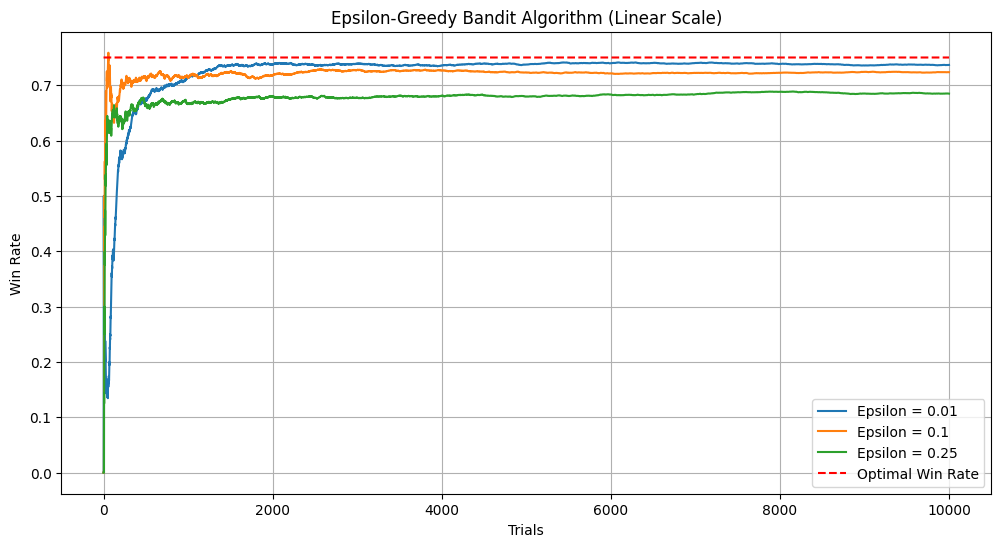

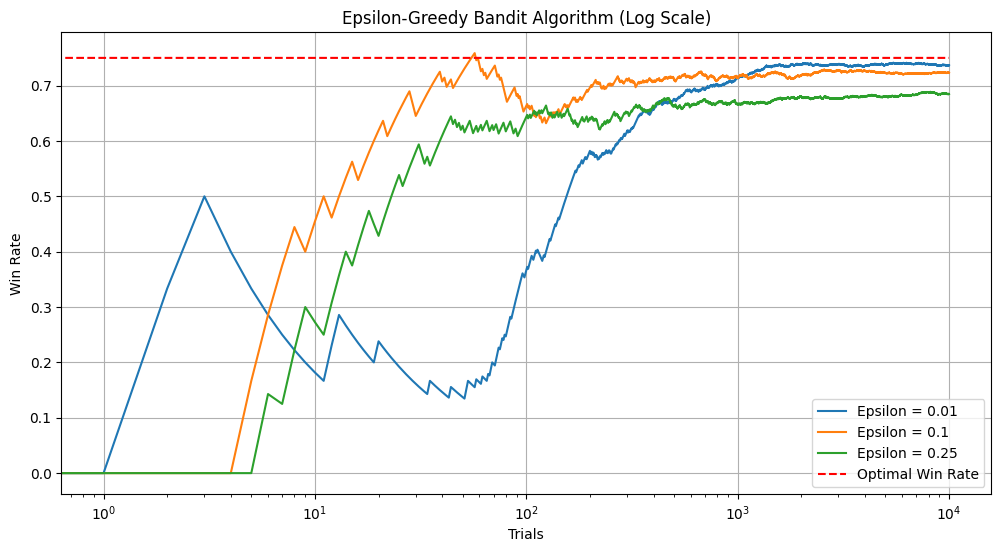

In [3]:
import matplotlib.pyplot as plt
import numpy as np


class Bandit:
    def __init__(self, p):
        """
        Initialize a bandit with a given win probability 'p'.
        """
        self.p = p
        self.p_estimate = 0.0  # Start with an initial estimate of 0.
        self.N = 0  # Num of samples collected so far. Start with an initial value of 0.

    def pull(self):
        """
        Simulates pulling the bandit's arm.
        Returns 1 (win) with probability 'p', and 0 (loss) otherwise.
        """
        return np.random.random() < self.p  # Random number in [0,1], true if less than p

    def update(self, x):
        """
        Updates the agent's estimate of the bandit's win rate.
        Formula used:
        p_estimate = ((total_trials-1) * current_p_estimate + current_reward) / total_trials
        """
        self.N += 1.0  # Increment the number of samples collected
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N


def experiment(bandit_probabilities, num_trials, epsilon):
    """
    Runs the epsilon-greedy algorithm to learn the best bandit over a number of trials.
    """
    bandits = [Bandit(p) for p in bandit_probabilities]  # Initialize bandits with true probabilities

    rewards = np.zeros(num_trials)  # Array to store rewards for each trial
    num_optimal = 0  # Track how often the best bandit is chosen
    optimal_j = np.argmax(bandit_probabilities)  # The index of the optimal (highest true probability) bandit
    num_explored = 0
    num_exploited = 0

    for i in range(num_trials):
        # Epsilon-greedy action selection:
        if np.random.random() < epsilon:
            j = np.random.randint(len(bandits))  # Explore
            num_explored += 1
        else:
            j = np.argmax([b.p_estimate for b in bandits])  # Exploit
            num_exploited += 1

        if j == optimal_j:
            num_optimal += 1  # Increment if we chose the optimal bandit

        # Pull the selected bandit's arm
        x = bandits[j].pull()
        rewards[i] = x  # Store the reward for this trial (1 for win, 0 for loss)

        # Update the estimate of the bandit based on the result
        bandits[j].update(x)

    # Calculate statistics
    mean_estimates = [b.p_estimate for b in bandits]
    total_reward = rewards.sum()
    overall_win_rate = total_reward / num_trials

    return rewards, num_optimal, num_explored, num_exploited, mean_estimates, total_reward, overall_win_rate, optimal_j


def compare_epsilons(bandit_probabilities, num_trials, epsilons):
    """
    Compare different epsilon values by running experiments and printing results.
    """
    results = {}

    # Run experiment for each epsilon value
    for epsilon in epsilons:
        rewards, num_optimal, num_explored, num_exploited, mean_estimates, total_reward, overall_win_rate, optimal_j = experiment(bandit_probabilities, num_trials, epsilon)
        results[epsilon] = {
            "rewards": rewards,
            "num_optimal": num_optimal,
            "num_explored": num_explored,
            "num_exploited": num_exploited,
            "mean_estimates": mean_estimates,
            "total_reward": total_reward,
            "overall_win_rate": overall_win_rate,
            "optimal_j": optimal_j
        }
        # Print statistics for each epsilon
        print(f"\nResults for epsilon = {epsilon}:")
        print(f"Optimal bandit index: {optimal_j}")
        print(f"Mean estimates for each bandit: {mean_estimates}")
        print(f"Total reward earned: {total_reward}")
        print(f"Overall win rate: {overall_win_rate}")
        print(f"Number of times explored: {num_explored}")
        print(f"Number of times exploited: {num_exploited}")
        print(f"Number of times optimal bandit selected: {num_optimal}")

    # Plot results
    plot_results(results, bandit_probabilities, num_trials, epsilons)


def plot_results(results, bandit_probabilities, num_trials, epsilons):
    """
    Plots win rates for different epsilon values in both linear and log scales.
    """
    plt.figure(figsize=(12, 6))

    # Linear scale plot
    for epsilon in epsilons:
        cumulative_rewards = np.cumsum(results[epsilon]["rewards"])
        win_rates = cumulative_rewards / (np.arange(num_trials) + 1)
        plt.plot(win_rates, label=f'Epsilon = {epsilon}')
    plt.plot(np.ones(num_trials) * np.max(bandit_probabilities),
             linestyle='--', color='red', label='Optimal Win Rate')
    plt.xlabel('Trials')
    plt.ylabel('Win Rate')
    plt.title('Epsilon-Greedy Bandit Algorithm (Linear Scale)')
    plt.legend(loc=4)
    plt.grid()
    plt.show()

    # Log scale plot
    plt.figure(figsize=(12, 6))
    for epsilon in epsilons:
        cumulative_rewards = np.cumsum(results[epsilon]["rewards"])
        win_rates = cumulative_rewards / (np.arange(num_trials) + 1)
        plt.plot(win_rates, label=f'Epsilon = {epsilon}')
    plt.plot(np.ones(num_trials) * np.max(bandit_probabilities),
             linestyle='--', color='red', label='Optimal Win Rate')
    plt.xscale('log')
    plt.xlabel('Trials')
    plt.ylabel('Win Rate')
    plt.title('Epsilon-Greedy Bandit Algorithm (Log Scale)')
    plt.legend(loc=4)
    plt.grid()
    plt.show()


if __name__ == "__main__":
    BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]  # The true probabilities of each bandit
    NUM_TRIALS = 10000  # Number of trials to simulate
    EPSILONS = [0.01, 0.1, 0.25]  # List of epsilon values to compare
    compare_epsilons(BANDIT_PROBABILITIES, NUM_TRIALS, EPSILONS)

The results for the different epsilon values show how the epsilon-greedy strategy balances exploration (trying new bandits) and exploitation (choosing the best-known bandit) across different configurations.

**Epsilon = 0.01:**

- Exploration: Only 97 times (out of 10,000 trials) were random bandits chosen (very few explorations).
- Exploitation: The model exploited 99.03% of the time, choosing the bandit with the best current estimate.
- Mean estimates: The estimates for the three bandits converge quite closely to their true values. The estimate for the best bandit (index 2) is 0.741, which is very close to its true probability (0.75).
- Total reward: The highest total reward of 7279 indicates that focusing on exploiting more often helped maximize rewards.
- Optimal bandit selections: The optimal bandit (index 2) was selected 9712 times, reflecting the high success of exploitation.

**Epsilon = 0.1:**

- Exploration: The model explored more often, with 991 explorations.
- Exploitation: 90.09% exploitation rate.
- Mean estimates: The estimates for the second and third bandits are reasonably close to their true values, but the first bandit’s estimate is a bit further from its true probability.
- Total reward: The total reward dropped to 7159, showing a slight reduction in efficiency due to more exploration compared to epsilon = 0.01.
- Optimal bandit selections: The optimal bandit was chosen 9266 times, slightly less than for epsilon = 0.01.

**Epsilon = 0.25:**

- Exploration: With 2453 explorations, this configuration explored the most.
- Exploitation: Exploited only 75.47% of the time.
- Mean estimates: While the estimates for the second and third bandits remain fairly close to the true values, the estimate for the first bandit is further off, indicating that more exploration reduced the accuracy of the estimates for less optimal bandits.
- Total reward: The lowest total reward of 6831 demonstrates how excessive exploration can lead to suboptimal overall performance.
- Optimal bandit selections: The optimal bandit was selected 8235 times, which is significantly fewer compared to the other two configurations.

**Why Epsilon = 0.01 Converges Better to the True Probability:**

- Low exploration rate: With epsilon = 0.01, the model explores very rarely (only 97 times), which allows it to focus on exploiting the best-known bandit for the majority of the trials. This heavy focus on exploitation leads to more frequent selections of the bandit with the highest true probability (0.75), which in turn allows the model to refine its estimate for that bandit more accurately.
- Stabilized estimate: Because the model spends most of its trials exploiting, the estimate for the best bandit converges to the true probability more quickly. There’s less noise from frequent exploration, so the estimate stabilizes over time.

  In contrast, with higher epsilon values (0.1 and 0.25), more frequent exploration introduces more variability in the reward data, making it harder for the estimates to converge as closely to the true probabilities by the end of the experiment.